This is Ankit. As part of my indepedent study in my master, I have made this report to get coordinates of points where the tapped has been occured. I have used MutliOutputRegressor to predict the X and Y cooradinates of points where tapped has been occured. In given datasets, Xa.npy has the singals data recorded by sensors when tapped has been occured. Ya.npy has the coordinates of points where tapped has been occured to record the singals for Xa.npy.

In [2]:
from sklearn import linear_model

import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.multioutput import MultiOutputRegressor
import math
import matplotlib.pyplot as plt
import matplotlib



def Model():
    #clf = linear_model.LinearRegression(normalize= True, n_jobs =1000)
    #clf = MLPClassifier(max_iter=2000)
    clf = MultiOutputRegressor(estimator=RandomForestRegressor(max_depth=1000,random_state=1), n_jobs = 100)
    return clf

def featureVector(data_X, data_Y):
    dataset_x = np.zeros((len(data_X),16))
    for index in range(len(data_X)):
        data = data_X[index]
        mean = np.mean(data, axis=0)
        std = np.std(data, axis=0)
        dataset_x[index] = np.concatenate((std,mean), axis=0)

    dataset_y = data_Y
    return dataset_x, dataset_y

def MSE(recorded_y, actual_y):
    sum = 0.0
    for index in range(len(recorded_y)):
        sum = sum + math.sqrt((recorded_y[index][0] - actual_y[index][0])**2+(recorded_y[index][1] - actual_y[index][1])**2)

    return sum/len(recorded_y)

def distance (recorded_y, actual_y):
    distances = []
    for index in range(len(recorded_y)):
        dis = math.sqrt((recorded_y[index][0] - actual_y[index][0])**2+(recorded_y[index][1] - actual_y[index][1])**2)
        distances.append(dis)
    return distances

if __name__ == '__main__':
    data_X = np.load('Xa.npy')
    data_Y = np.load('Ya.npy')


    dataset_X, dataset_Y = featureVector(data_X, data_Y)
    data_train_x, data_test_x, data_train_y, data_test_y = train_test_split(dataset_X, dataset_Y, test_size=0.2,random_state=1)


    model = Model()
    model.fit(data_train_x, data_train_y)
    recorded_y = model.predict(data_test_x)

    print("MSE =", MSE(recorded_y, data_test_y))

MSE = 1.2872698388896013


In [3]:
errors = distance(recorded_y, data_test_y)
print("Error distance: ",errors)

Error distance:  [0.0, 0.0, 0.0, 0.6500000000000004, 0.0, 4.802343178074636, 0.0, 0.0, 0.0, 3.0, 0.5, 2.5, 7.106335201775948, 0.0, 0.0, 0.5, 0.0, 1.25, 0.09999999999999964, 1.1926860441876563, 1.0, 0.0, 0.5, 0.75, 0.0, 0.5, 0.0, 2.0, 0.0, 0.0, 1.0, 0.5, 1.5, 0.5, 1.5, 0.0, 1.0, 0.5, 0.5, 0.0, 4.589389937671455, 1.5, 1.3000000000000007, 2.0, 1.5, 0.0, 0.0, 0.0, 0.0, 0.75, 6.5431261641512, 0.0, 0.0, 0.5, 3.0, 1.0, 2.583118270617898, 4.0, 1.2999999999999998, 1.0, 0.0, 2.5, 1.5, 0.5, 4.16082924427331, 2.5, 0.0, 4.0697051490249265, 0.0, 0.75, 0.0, 1.0, 0.0, 2.25, 0.0, 0.0, 0.5, 0.0, 0.0, 2.0, 10.062305898749054, 1.0, 6.5, 0.75, 0.5, 0.0, 1.2999999999999998, 0.0, 2.0, 0.0, 0.6500000000000004, 0.0, 9.100137361600648, 0.0, 0.5, 1.5, 0.0, 0.0, 2.102974084481309, 2.5, 0.75, 0.5, 2.5, 0.6500000000000004, 0.65, 0.0, 1.95, 3.75, 4.242640687119285, 0.0, 0.0, 2.0, 0.0, 0.0, 2.462214450449026, 4.562071897723665, 1.5, 0.5, 0.0, 4.422951503238533, 3.559845502265513, 0.0, 3.5, 0.0, 2.1213203435596424, 0.

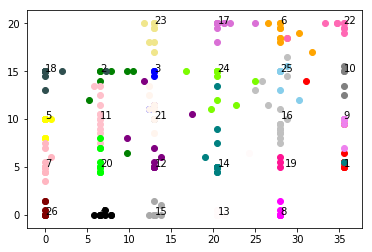

In [4]:
cluster_point = {}
for recorded_point, actual_point in zip(recorded_y, data_test_y):
    if str(actual_point) in cluster_point.keys():
        list = cluster_point.get(str(actual_point))
        list.append(recorded_point)
        cluster_point[str(actual_point)] = list
    else:
        list = [recorded_point]
        cluster_point[str(actual_point)] = list


actual_point_list = []
cluster_point_list = []
for key, value in cluster_point.items():
    actual_point_list.append(key)
    cluster_point_list.append(value)

colorsss = ["red", "green", "blue", "black", "yellow", "orange", "lightpink", "magenta", "violet", "gray", "pink", "purple", "snow", "teal", "darkgray",
                "silver", "orchid", "darkslategray", "deeppink", "lime", "seashell", "hotpink", "khaki", "lawngreen", "skyblue", "maroon"]
markers = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27']

x = [35.5, 6.5, 13.0, 6.5, 0.0, 28.0, 0.0, 28.0, 35.5, 35.5, 6.5, 13.0, 20.5, 20.5, 13.0, 28.0, 20.5, 0.0, 28.5, 6.5, 13.0, 35.5, 13.0, 20.5, 28.0, 0.0]
y = [5.0, 15.0, 15.0, 0.0, 10.0, 20.0, 5.0, 0.0, 10.0, 15.0, 10.0, 5.0, 0.0, 5.0, 0.0, 10.0, 20.0, 15.0, 5.0, 5.0, 10.0, 20.0, 20.0, 15.0, 15.0, 0.0]
for index, (key, value) in enumerate(cluster_point.items()):
    X = [x[0]  for x in value]
    Y = [y[1]  for y in value]
    plt.scatter(X,Y,alpha=1, color=colorsss[index])
    plt.annotate(markers[index],(x[index],y[index]))
plt.show()